In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('simulation/results_1.csv')
df.head()

,seed,N,n,p,K,r,m,phi,spatial_svd_time,spatial_svd_err,spatial_svd_acc,vanilla_svd_time,vanilla_svd_err,vanilla_svd_acc
0,78,30,1000,30,3,0.05,5,0.1,1195.856676,12.889798,0.965,3.533110,13.682675,0.631
1,67,10,1000,30,3,0.05,5,0.1,1435.114066,10.907392,0.957,3.226698,20.139348,0.504
2,358,30,1000,50,3,0.05,5,0.1,1566.571984,11.633397,0.942,3.141542,11.909950,0.677
3,52,10,1000,30,3,0.05,5,0.1,1357.815389,8.711561,0.953,3.237941,20.628954,0.472
4,347,10,1000,50,3,0.05,5,0.1,2295.618855,10.790922,0.930,3.257978,19.804067,0.301


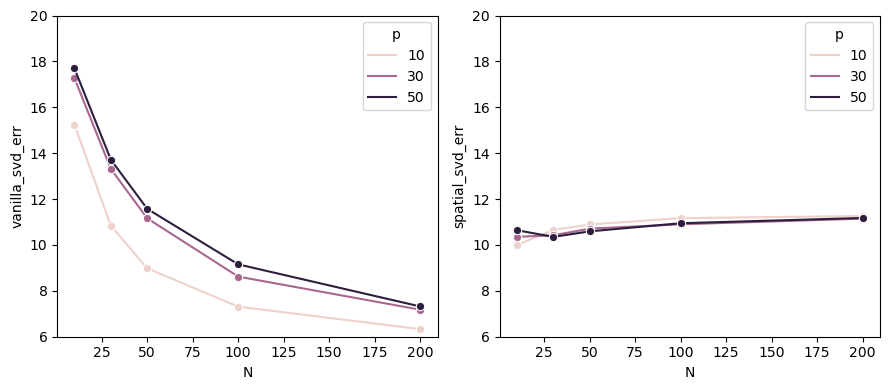

In [2]:
df_grouped = df.groupby(['N','n','p',]).agg({'seed':'count', 
                                'spatial_svd_time':'mean', 
                                'spatial_svd_err':'mean', 
                                'spatial_svd_acc':'mean',
                                'vanilla_svd_time':'mean',
                                'vanilla_svd_err':'mean',
                                'vanilla_svd_acc':'mean',}).rename(columns={'seed':'count'})

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.lineplot(x='N', y='vanilla_svd_err', data=df_grouped, hue = 'p', ax = axes[0], marker='o')
sns.lineplot(x='N', y='spatial_svd_err', data=df_grouped, hue = 'p', ax = axes[1], marker='o')
axes[0].set_ylim(6, 20) 
axes[1].set_ylim(6, 20) 
plt.tight_layout()
plt.show()

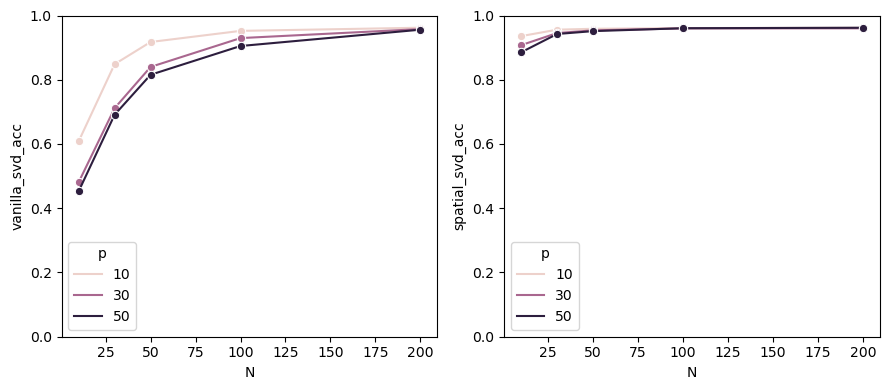

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.lineplot(x='N', y='vanilla_svd_acc', data=df_grouped, hue = 'p', ax = axes[0], marker='o')
sns.lineplot(x='N', y='spatial_svd_acc', data=df_grouped, hue = 'p', ax = axes[1], marker='o')
axes[0].set_ylim(0, 1) 
axes[1].set_ylim(0, 1) 
plt.tight_layout()
plt.show()

<Axes: xlabel='N', ylabel='spatial_svd_time'>

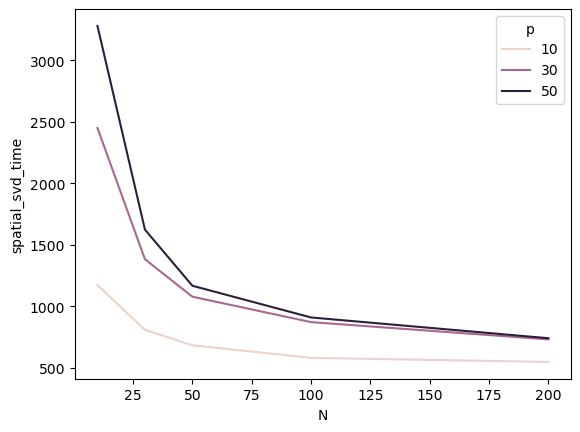

In [4]:
sns.lineplot(x='N', y='spatial_svd_time', data=df_grouped, hue = 'p')